# Assignment 7- Graphical Analysis with Python
This code reads in a data file with information on earthquakes from the USGS website and performs several graphical analysis techniques to give an idea about the data in the file. 
Author: Avnika Manaktala
Data Created: 3/1/2020

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns

In [2]:
# Reading the data
data= pd.read_table("all_month.csv", header=0, delimiter= ',')

Text(0.5, 1.0, 'Histogram of Magnitude Values')

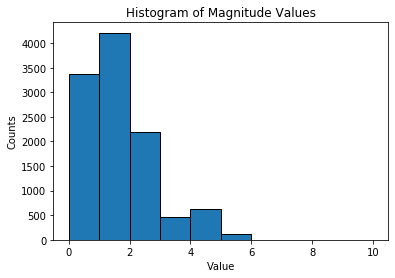

In [30]:
#Plotting histogram
plt.hist(data['mag'], bins= list(range(0,11)), edgecolor= 'black') #Plotting histogram with bin size 1 between 0 and 11
plt.xlabel('Value') #Display x labels
plt.ylabel('Counts') #Display y labels
plt.title('Histogram of Magnitude Values') #Display Title

Kernel Type: Gaussian; Kernel Width: 0.05


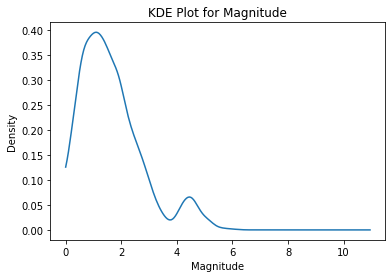

In [38]:
# Plotting KDE 
np.isnan(data['mag']).any() #Searching if there are any NA values
magnitude = np.nan_to_num(data['mag']) #Converting NA values to 0

density = sc.gaussian_kde(magnitude) #Generating density for points
x = np.arange(0., 11, .05) # Specifying range and kernel width
plt.plot(x, density(x)) #Display plot
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('KDE Plot for Magnitude')
print("Kernel Type: Gaussian; Kernel Width: 0.05")

Text(0.5, 1.0, 'Distribution of Earthquakes')

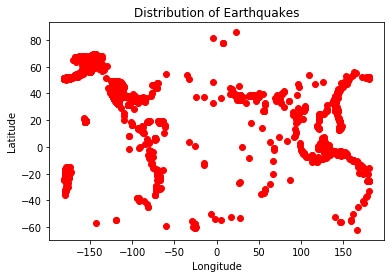

In [32]:
# Plotting distribution of Earthquakes
plt.plot(data["longitude"], data["latitude"], 'ro') #Display plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Earthquakes')

Text(0.5, 1.0, 'Cumulative Distribution Plot for Depth')

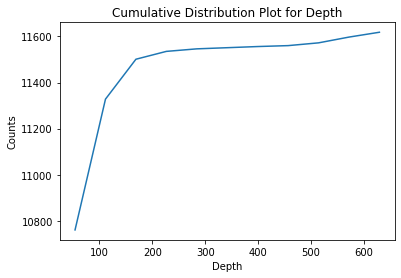

In [34]:
# Potting Cumulative Distribution
num_bins = len(list(range(0,11))) #Specifying number of bins
counts, bin_edges = np.histogram(data['depth'], bins=num_bins) #Grabbing counts and bin width from histogram function
cdf= np.cumsum(counts) #Summing values per bin
plt.plot(bin_edges[1:], cdf) #Displaying plot
plt.xlabel('Depth')
plt.ylabel('Counts')
plt.title('Cumulative Distribution Plot for Depth')

Text(0.5, 1.0, 'Depth vs. Magnitude')

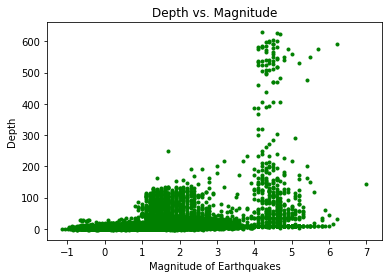

In [36]:
# Scatter plot of Depth vs. Magnitude of Earthquakes
plt.scatter(data['mag'], data['depth'], c= 'green', marker=".") #Displaying plot
plt.xlabel('Magnitude of Earthquakes')
plt.ylabel('Depth')
plt.title('Depth vs. Magnitude')

((array([-3.84752025, -3.62440481, -3.50200617, ...,  3.50200617,
          3.62440481,  3.84752025]),
  array([-1.13, -1.07, -0.99, ...,  7.  ,   nan,   nan])),
 (nan, nan, nan))

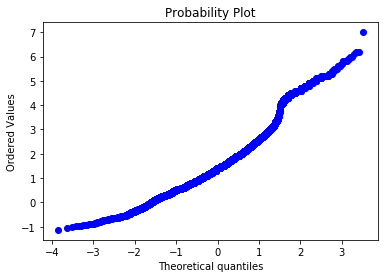

In [37]:
# Generating Q-Q plot of the magnitude of earthquakes
sc.probplot(data['mag'], plot= plt)